In [1]:
import ball_functions as f
from IPython.display import clear_output, display, HTML 
from ipywidgets import interact, interactive  
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Swarming Model

In [2]:
a,b,c = f.main()

#np.shape(a)
#f.scatter_t(a,b,c,-1)

In [3]:
def plot_temp(t):
    f.scatter_t(a,b,c,t)
    
interact(plot_temp, t=(0,a.shape[0]-1,1))

interactive(children=(IntSlider(value=99, description='t', max=199), Output()), _dom_classes=('widget-interact…

<function __main__.plot_temp(t)>

# Collision Model

KeyboardInterrupt: 

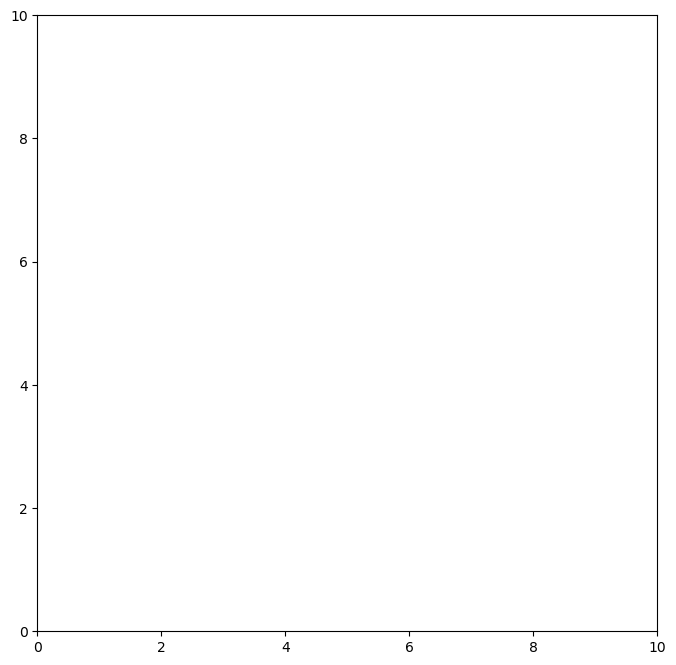

In [2]:
# collisions animation
def update(t,dynamic,scatter):
    x,y,theta = next(dynamic)
    scatter.set_data([x,y])
    return scatter,

t = np.linspace(0, 4, 100)
dynamic = f.dynamic_gen()
x,y,theta = next(dynamic)

fig, ax = plt.subplots(1,1,figsize=(8,8))
scatter, = ax.plot(x,y,'ob',ms=5)
ax.set_xlim(0,10); ax.set_ylim(0,10)

ani = FuncAnimation(fig, update, frames=t, fargs=(dynamic,scatter), repeat=False,cache_frame_data=False)
ani.save('try.gif', writer='imagemagick')

# use

In [1]:
import ball_functions as f
from IPython.display import clear_output, display, HTML 
from ipywidgets import interact, interactive  
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
dynamic = f.dynamic_gen()

def plot_temp(t):
    x,y,th = next(dynamic)
    f.scatter(x,y,th)
    
interact(plot_temp, t=(0,1,0.001))

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.001), Output()), _dom_classes=('…

<function __main__.plot_temp(t)>